## Instructions

This notebook consists of 6 parts.  The point-value of each part is indicated in the section header.

In [ ]:
# Execute this cell to import the foundational libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Part 1: Modules 01-08
Total Part Value: 10 Points

## Challenge: Matrix Manipulations (2 Points)

In [ ]:
# Challenge Cell: 1 Point
# Create a 2-dimensional array named 'A' with the following values:
# [8,7,6]
# [5,4,3]
A = [[8,7,6],[5,4,3]]
A = np.array(A)

In [ ]:
# Challenge Cell: 1 Point
# Given the definition of the matrix A in the code cell above, calculate the dot-product of A^T and A
AT = A.T

answer = AT @ A
answer

## Challenge: Graphing (2 Point)


In [ ]:
x = [i for i in range(10)]
print("Values of X:",x)

y = [2 ** i for i in range(10)]
print("Values of Y:",y)

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
# Challenge Cell: 1 Point
# Add a title, x-label, and y-label and re-draw the graph
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Basic Graph")
plt.plot(x,y)
plt.show()

In [ ]:
import seaborn as sns

sns.set(style="darkgrid")
df = sns.load_dataset('iris')

sns.boxplot(x=df["species"], y=df["sepal_length"])
plt.show()

In [ ]:
# Challenge Cell: 1 Point
# Using the graph created above, what is the approximate range of values
# of the 'versicolor' sepal length?
"""
The values range from approcimately 4.9 to 7.0
"""

## Challenge: Logistic Regression (5 Points)

In [ ]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
z = X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

In [ ]:
# Challenge Cell: 1 Point
# Split the x, y data into x_train/y_train (75%), and x_test/y_test (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Challenge Cell: 1 Point
# Create a Logistic Regression model
model = LogisticRegression()

In [ ]:
# Challenge Cell: 1 Point
# Train the Logistic Regression model
model.fit(X_train, y_train)

In [ ]:
# Challenge Cell: 1 Point
# Perform prediction using the test dataset
y_pred = model.predict(X_test)
y_pred

In [ ]:
# Challenge Cell: 1 Point
# Show the Confusion Matrix for performance of the logistic regression model
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Challenge Cell: 1 Point
# Display the accuracy of the logistic regression model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

# Part 2: Neural Networks (Modules 09)
Total Part Value: 6 Points

## Challenge: Load and Transform the Data (2 Point)

In [ ]:
# generate the data
data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

data['y'] = data.apply(testing, axis=1)

data.head()

In [ ]:
# Challenge Cell: 1 Point
# How many categories are in this dataset?
np.unique(data['y'])

In [ ]:
# Challenge Cell: 1 Point
# What is the mathematical operation(s) that distinguish the categories?
#The code is checking if the sum of the inputs is greater than 1 or not

## Challenge: Build the Model (2 Points)




In [ ]:
# define the SingleLayerPerception
class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate

    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer

    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture

    def neuron_propagate(self, inputs):
        processing = self.neuron(inputs)
        return self.activation(processing)

    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation

In [ ]:
# define the parameters for the upcoming Single Layer Perception creation

InitialWeights = [0.1, 0.1]
LearningRate = 0.1
InitialBias = 0.01

In [ ]:
# Challenge Cell: 2 Point
# Using the variables established above,
# Create a Single Layer Perception and assign to a variable named SLperceptron
SLperceptron = SingleLayerPerceptron(my_weights=InitialWeights, my_bias=InitialBias, learningRate=LearningRate)

## Challenge: Train the Model (2 Points)

In [ ]:
# define the necessary utility functions
import random, itertools

def show_dataset(data, ax):
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title(' My Dataset')
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

def showAll(perceptron, data, threshold=1, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

In [ ]:
# Challenge Cell: 1 Point
# Train your SLperceptron using the trainingData function
trained = trainingData(SLperceptron, data)
trained

In [ ]:
# Challenge Cell: 1 Point
# Use the showAll function to demonstrate the results of your training in the prior cell

showAll(SLperceptron, data, threshold=1, ax=None)


# Part 3: Deep Learning (Module 10)
Total Part Value: 6 Points

## Challenge: Load and Transform Data (2 Points)
Load the MNIST dataset from the Keras library

In [ ]:
# import the libraries
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
# Challenge Cell: 1 Point
# Load the mnist data into (X_train, y_train) and (X_test, y_test)
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# reshape the data
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

In [ ]:
# Challenge Cell: 1 point
# Perform One-Hot Encoding
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

## Challenge: Build the Neural Network (2 Points)

Create a Sequential Model according to the following specification:
1. Input (Dense) Layer, 4 Hidden (Dense) Layers, and an Output (Dense) Layer
2. Each Layer has 500 Units, Activation = 'relu', and L1 and L2 Regularization with Lambda = 0.001
3. Output Layer has Activation = 'softmax'

In [ ]:
# Challenge Cell: 2 Points
# Create Sequential Model and assign it to a variable named model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

## Challenge: Train and Evaluate the Model (2 Points)

In [ ]:
# to compile & train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model=model.fit(x=X_train, y=Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test), callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)])

In [ ]:
# Challenge Cell: 1 Point
# Plot the loss of the model
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(trained_model.history['loss'], label='Train')
plt.plot(trained_model.history['val_loss'], label='Val')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss for batch_size=128 and epochs=10')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Challenge Cell: 1 Point
# Plot the accuracy of the model
plt.figure(figsize=(8, 5))

plt.plot(trained_model.history['accuracy'], label='Train')
plt.plot(trained_model.history['val_accuracy'], label='Val')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model accuracy for batch_size=128 and epochs=10')
plt.legend()
plt.grid(True)

plt.show()

# Part 4: Supervised Learning AI Models (Module 11)
Total Part Value: 6 Points

## Challenge: Load and Transform Data (2 Point)

In [ ]:
# import the libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns


In [ ]:
# Challenge Cell: 1 Point
# Load the Scikit-Learn breat cancer data set into a variable named breast_cancer_data
breast_cancer_data = load_breast_cancer()

In [ ]:
# create X and y from the Scikit-Learn data
# create a DataFrame from the dataset
breast_cancer_dataframe = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
breast_cancer_dataframe['target'] = breast_cancer_data.target

X = breast_cancer_dataframe.iloc[:, :-1]
y = breast_cancer_dataframe.iloc[:, -1]

In [ ]:
# Challenge Cell: 1 Point
# Transform the data using the StandardScaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

## Challenge: Split the Data (1 Point)
In the cell below, split the data into Training (80%), and Test (20%)

In [ ]:
# Challenge Cell: 1 Points
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2)

## Challenge: Create and Train the Models (2 Points)

In the code cell below, create and train a KNN and DecisionTree Classifier model

In [ ]:
# Challenge Cell: 1 Points
# Create and train a KNN model with k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

In [ ]:
# Challenge Cell: 1 Points
# Create and train a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

## Challenge: Evaluation (1 Point)

In [ ]:
# calcuate the performance metrics for KNN
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions on test data
y_test_predict = knn.predict(X_test)

# Calculate accuracy scores for train and test data
acc_train = knn.score(X_train, y_train)
acc_test = knn.score(X_test, y_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_predict)
print("Test Score: {}, Train Score: {}".format(round(acc_test,4), round(acc_train,4)))
print("CM: \n",cm)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_test_predict))

In [ ]:
# Challenge Cell: 1 Point
# Calculate the performance metrics for the Decision Tree Classifier

from sklearn.metrics import confusion_matrix, classification_report
# Make predictions on test data
y_test_predict = dt.predict(X_test)

# Calculate accuracy scores for train and test data
acc_train = dt.score(X_train, y_train)
acc_test = dt.score(X_test, y_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_predict)
print("Test Score: {}, Train Score: {}".format(round(acc_test,4), round(acc_train,4)))
print("CM: \n",cm)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_test_predict))

# Part 5: Unsupervised Learning AI Models (Module12)
Total Part Value: 6 Points

## Challenge: Load and Transform Data (1 Point)
1. Retrieve the Recommendation Data from the Module16 Attachments:
<br/>  1.a. CISD307-M16-Final-RecommendationMatrix-Data.csv
<br/> 1.b. CISD307-M16-Final-Recommendation-Data.csv
2. Upload data to this notebook
3. Complete the section by following the instructions below

In [ ]:
# Challenge Cell: 1 Point
# Load the file 'CISD307-M16-Final-Recommendation-Data.csv' into a DataFrame called ratings_dataframe
ratings_dataframe = pd.read_csv('/content/CISD307-M16-Final-Recommendation-Data.csv')

In [ ]:
# load the file 'CISD307-M16-Final-RecommendationMatrix-Data.csv' into a DataFrame called matrix_dataframe
matrix_dataframe = pd.read_csv('/content/CISD307-M16-Final-RecommendationMatrix-Data.csv', index_col='User-ID')

In [ ]:
!pip install "numpy<2"

In [ ]:
# load the 'surprise' library
!pip install surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate

In [ ]:
# build the 'surprise' structures
reader = Reader(rating_scale=(0, 10))
surprise_data = Dataset.load_from_df(ratings_dataframe, reader)

## Challenge: Split the Data (1 Point)

In the cell below, use the 'surprise' version of train_test_split to split the data into Training (75%), and Test (25%)


In [ ]:
# Challenge Cell: 1 Point

In [ ]:
# see the number of items in trainset
trainset, testset = train_test_split(surprise_data,test_size=0.25,)
print(trainset.n_items)

## Challenge: Create and Train the Model (1 Point)

Using the training data from the prior step and the SVD model created below, train the model.


In [ ]:
# create the model
svd = SVD()

## Challenge: Make Predictions (1 Point)


In [ ]:
# Challenge Cell: 1 Point
# Train the SVD model
svd.fit(trainset)

In [ ]:
# predict the ISBN ratings for user at index_val 2131
index_val = 2131
# get user id
userId = matrix_dataframe.index[index_val]
books = []
ratings = []

for isbn in matrix_dataframe.iloc[index_val][matrix_dataframe.iloc[index_val].isna()].index:
    books.append(isbn)
    ratings.append(svd.predict(userId, isbn).est)

prediction = pd.DataFrame({'ISBN':books, 'rating':ratings, 'userId':userId})
prediction = prediction.sort_values('rating', ascending=False).iloc[:10].reset_index(drop=True)

prediction

In [ ]:
# Challenge Cell: 1 Point
# Repeat the above for user at index_val = 912
# predict the ISBN ratings for user at index_val 2131
index_val = 912
# get user id
userId = matrix_dataframe.index[index_val]
books = []
ratings = []

for isbn in matrix_dataframe.iloc[index_val][matrix_dataframe.iloc[index_val].isna()].index:
    books.append(isbn)
    ratings.append(svd.predict(userId, isbn).est)

prediction = pd.DataFrame({'ISBN':books, 'rating':ratings, 'userId':userId})
prediction = prediction.sort_values('rating', ascending=False).iloc[:10].reset_index(drop=True)

prediction

## Challenge: Use mean of Other Users' Weighted Ratings (1 Point)

In [ ]:
# import the necessary library
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# replace NaN with user based average rating in pivot dataframe
imputed_dataframe = matrix_dataframe.fillna(matrix_dataframe.mean(axis=0))

In [ ]:
# view imputed_dataframe
imputed_dataframe

In the cell below, create the similarity_matrix using cosine_similarity and the imputed_dataframe above

In [ ]:
# Challenge Cell: 1 Point
similarity_matrix = cosine_similarity(imputed_dataframe)

## Challenge: Get Recommendations (1 Point)

In [ ]:
# define the function get_recommendation
def get_recommendation(user_index):
    idx = user_index
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # get books that are unrated by the given user
    unrated_books = matrix_dataframe.iloc[idx][matrix_dataframe.iloc[idx].isna()].index

    # get weighted ratings of unrated books by all other users
    book_ratings = (matrix_dataframe[unrated_books].T * similarity_matrix[idx]).T

    # get top 50 similar users by skipping the current user
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:101]

    # get mean of book ratings by top 100 most similar users for the unrated books
    book_ratings = book_ratings.iloc[[x[0] for x in sim_scores]].mean()

    # get rid of null values and sort it based on ratings
    book_ratings = book_ratings.reset_index().dropna().sort_values(0, ascending=False).iloc[:10]
    recommended_books = ratings_dataframe.drop_duplicates('ISBN').reset_index(drop=True)
    # get recommended book titles in sorted order
    assumed_ratings = book_ratings[0].reset_index(drop=True)

    return pd.DataFrame({'ISBN':recommended_books['ISBN'],
                         'Assumed Rating':assumed_ratings})

In [ ]:
# Challenge Cell: 1 Point
# Use the function get_recommendation to get recommendations for user at user_index 2131
recommended_books = get_recommendation(2131)

In [ ]:
# see the 10-top recommended books
recommended_books.iloc[:10]

# Part 6: Deep Learning AI Models (Module13)
Total Part Value: 6 Points

## Challenge: Load and Transform Data (1 Point)
1. Retrieve the Concrete Cracks Data from the Module 16 Attachments:
<br/> 1.a CISD307-M16-Final-ConcreteCracks-Data.zip
2. Upload data to this notebook (takes approx ~10 mins)
3. Complete the section by following the instructions below

Execute the code cells below:

In [ ]:
# Extract the images
!unzip -o CISD307-M16-Final-ConcreteCracks-Data.zip

In [ ]:
# import the necessary libraries
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [ ]:
# load the file serves as a 'table of contents' for the images
import urllib.request
urllib.request.urlretrieve("https://ethaneldridge.github.io/cisd307/M16-FinalExam/Dataset_ConcreteCracks.json", './ConcreteCracks.json')

In [ ]:
# interpret the type of image and classify as Cracked or not.
df = pd.read_json(r'ConcreteCracks.json', lines=True)
df['label'] = df.annotation.apply(lambda x: x['labels'][0] if len(x['labels'])==1 else 'Crack')
print(df.shape)

In [ ]:
# load the images according to classification.
import cv2
base_path = '/content/'

images = []
for index, row in df.iterrows():
    path_type = 'Negative/'
    if row['label'] == 'Crack':
        path_type = 'Positive/'

    filename = row['content'][-9:]
    image_path = base_path + path_type + filename
    print(row['label'] + ":" + image_path)
    img = cv2.imread(image_path)
    numpy_img = img_to_array(img)
    img_batch = np.expand_dims(numpy_img, axis=0)
    images.append(img_batch.astype('float16'))

images = np.vstack(images)

In [ ]:
# display some of the images
image_set = range(0,4)
f, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize = (16,10))

for ax, img, title in zip(axes.ravel(), images[image_set], df['label'][image_set]):
    ax.imshow(array_to_img(img))
    ax.set_title(title)

In [ ]:
# encode the label (aka target) value
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

Perform One-Hot Encoding of df.label and assign to the variable y

In [ ]:
# Challenge Cell: 1 point
# Perform One-Hot Encoding
y = pd.get_dummies(df['label'])

In [ ]:
# see the values in 'y' as a result of One-Hot Encoding
print(y)

## Challenge: Split the Data (1 Point)

In the cell below, split the data into Training (30%), Validation (15%), and Test (15%) as illustrated in the visualizations


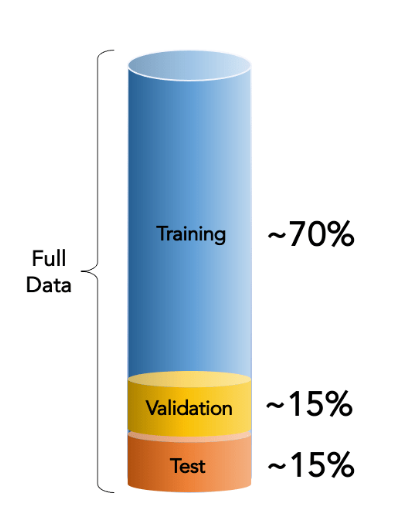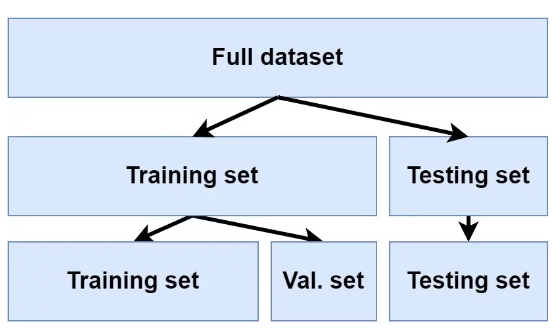

In [ ]:
# Challenge Cell: 1 Point
X = df.drop(columns=['label']).select_dtypes(include=['number'])
y_labels = df['label']

X_scaled = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_labels, test_size=0.30)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [ ]:
# see the results of splitting the data
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

In summary, we now have a total of six variables for our datasets we will use:

- X_train (998 samples, or ~70% of full dataset)
- X_val (214 samples, or ~15% of full dataset)
- X_test (215 samples, or ~15% of full dataset)
- y_train (998 labels, or ~70% of full dataset)
- y_val (214 labels, or ~15% of full dataset)
- y_test (215 labels, or ~15% of full dataset)

In [ ]:
# see the shape of an image
images[0].shape

## Challenge: Build the Neural Network (2 Points)
In the cell below, create your own Neural Network model.
You can experiment by mixing layers of Conv2D, MaxPooling2D, and Dropout, of varying parameters.

In [ ]:
# Challenge Cell: 2 Points
# Build the model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [ ]:
# see the model
print(model.summary())

## Challenge: Compile the model (1 Point)
In the cell below, compile your model with the following parameters:
1. loss='categorical_crossentropy'
2. optimizer='adam'
3. metrics=['accuracy']

In [ ]:
# Challenge Cell: 1 Point
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Challenge: Train the Model (1 Point)
In the cell below, train your model with the following parameters:
1. batch_size=32
2. epochs=20

In [ ]:
# Challenge Cell: 1 Point
# Train the model and store the results in a variable named trained_model
Y_val = to_categorical(y_val)
trained_model = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, Y_val)
)

In [ ]:
# plot the accuracy of training your model
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# plot the loss of training your model
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()